In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


In [ ]:
data = pd.read_csv(filepath_or_buffer='../data/train_data.csv', sep=',')

C:\Users\tiago\AppData\Local\Temp\ipykernel_55108\3473717977.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath_or_buffer='./data/train_data.csv', sep=',')


In [ ]:
    # 2.1. FONT
#from matplotlib.font_manager import fontManager, FontProperties
#path = "/Users/hugo/Downloads/calibri.ttf"
#fontManager.addfont(path)


    # 2.2. TEMPLATE


def set_matplotlib_style(font_size=8):
        # Replicates the rcParams of seaborn's "whitegrid"
        plt.style.use("seaborn-v0_8-whitegrid")

        base_style = {
            # Use 10pt font in plots, to match 10pt font in document
            "axes.labelsize": (10 / 8) * font_size,
            "font.size": (10 / 8) * font_size,
            # Make the legend/label fonts a little smaller
            "legend.fontsize": font_size,
            "xtick.labelsize": font_size,
            "ytick.labelsize": font_size,
            # Subplots size/shape
            "figure.subplot.left": 0.098,
            "figure.subplot.right": 0.938,
            "figure.subplot.bottom": 0.12,
            "figure.subplot.top": 0.944,
            "figure.subplot.wspace": 0.071,
            'font.family' : 'sans-serif',
            'font.sans-serif' : ['calibri']
                    }

        return base_style

plt.rcParams.update(set_matplotlib_style(font_size=8))


FileNotFoundError: [Errno 2] No such file or directory: '/Users/hugo/Downloads/calibri.ttf'

In [ ]:
def density_and_boxplot(DataSet, column_label, title=None, bins=20, desired_x_label='', figure_name='density_and_boxplot', save=False,
                        box_left=0.115, box_width=0.853):

    # HISTOGRAM
    age_plot = sns.displot(data=DataSet,
                           x=column_label,
                           kde=True,
                           stat='density',
                           color='black',
                           edgecolor='white',
                           bins=bins)


    plt.title(title)
    age_plot.ax.set_xticks([])
    plt.xlabel('')
    fig = plt.gcf()  # Get current figure

    # BOXPLOT
    ax_box = fig.add_axes([box_left, 0.0363, box_width, 0.058])  # Position of the boxplot (left, bottom, width, height)

    sns.boxplot(x=DataSet[column_label],
                ax=ax_box,
                boxprops=dict(facecolor='grey', linewidth=0),  # Fill of the box
                medianprops=dict(color='white'),               # Median line color
                whiskerprops=dict(color='grey'),               # Whiskers color
                capprops=dict(color='black'),                  # Caps color
                flierprops=dict(marker='o',                    # Circular marker for outliers
                                markerfacecolor='grey',         # Fill for outliers
                                markeredgecolor='white',        # Border for outliers
                                markersize=4))                  # Size of outliers
    plt.xlabel(desired_x_label)  # Desired x-axis label

    if save:
        plt.savefig('./Figures/' + figure_name, bbox_inches='tight') and print("The following graph was stored in: ../Figures/{}".format('figure_name'))

    plt.show()

In [ ]:
(data.isna().sum()/len(data)*100).sort_values(ascending=False)

OIICS Nature of Injury Description    100.000000
IME-4 Count                            77.622664
First Hearing Date                     74.590502
C-3 Date                               68.449174
Birth Year                              8.176137
Average Weekly Wage                     8.104187
Zip Code                                8.101828
WCIO Part Of Body Code                  6.154808
WCIO Part Of Body Description           6.154808
WCIO Nature of Injury Code              5.914695
WCIO Nature of Injury Description       5.914695
WCIO Cause of Injury Description        5.911831
WCIO Cause of Injury Code               5.911831
C-2 Date                                5.729850
Industry Code                           4.954412
Industry Code Description               4.954412
Accident Date                           3.898084
Attorney/Representative                 3.276487
Age at Injury                           3.276487
County of Injury                        3.276487
District Name       

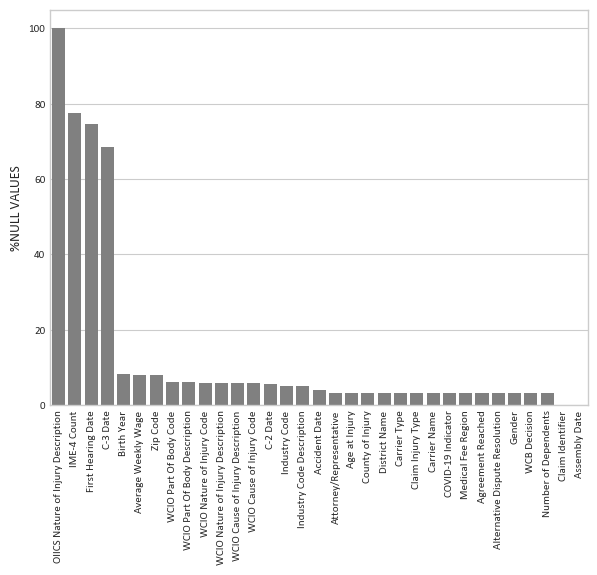

TOP TEN VARIABLES WITH MOST AMOUNT OF MISSING ENTRIES:
OIICS Nature of Injury Description    100.000000
IME-4 Count                            77.622664
First Hearing Date                     74.590502
C-3 Date                               68.449174
Birth Year                              8.176137
Average Weekly Wage                     8.104187
Zip Code                                8.101828
WCIO Part Of Body Code                  6.154808
WCIO Part Of Body Description           6.154808
WCIO Nature of Injury Code              5.914695
dtype: float64


In [ ]:
sns.barplot(data=(data.isna().sum()/len(data)*100).sort_values(ascending=False), color='grey')
plt.xticks(rotation=90)
plt.ylabel("%NULL VALUES")
plt.show()
plt.close()

print("TOP TEN VARIABLES WITH MOST AMOUNT OF MISSING ENTRIES:")
print((data.isna().sum()/len(data)*100).sort_values(ascending=False)[:10])

Accident Date  Age at Injury  Alternative Dispute Resolution  Assembly Date  Attorney/Representative  Average Weekly Wage  Birth Year  C-2 Date  C-3 Date  Carrier Name  Carrier Type  Claim Identifier  Claim Injury Type  County of Injury  COVID-19 Indicator  District Name  First Hearing Date  Gender  IME-4 Count  Industry Code  Industry Code Description  Medical Fee Region  OIICS Nature of Injury Description  WCIO Cause of Injury Code  WCIO Cause of Injury Description  WCIO Nature of Injury Code  WCIO Nature of Injury Description  WCIO Part Of Body Code  WCIO Part Of Body Description  Zip Code  Agreement Reached  WCB Decision  Number of Dependents
False          False          False                           False          False                    False                False       False     True      False         False         False             False              False             False               False          True                False   True         False          False           

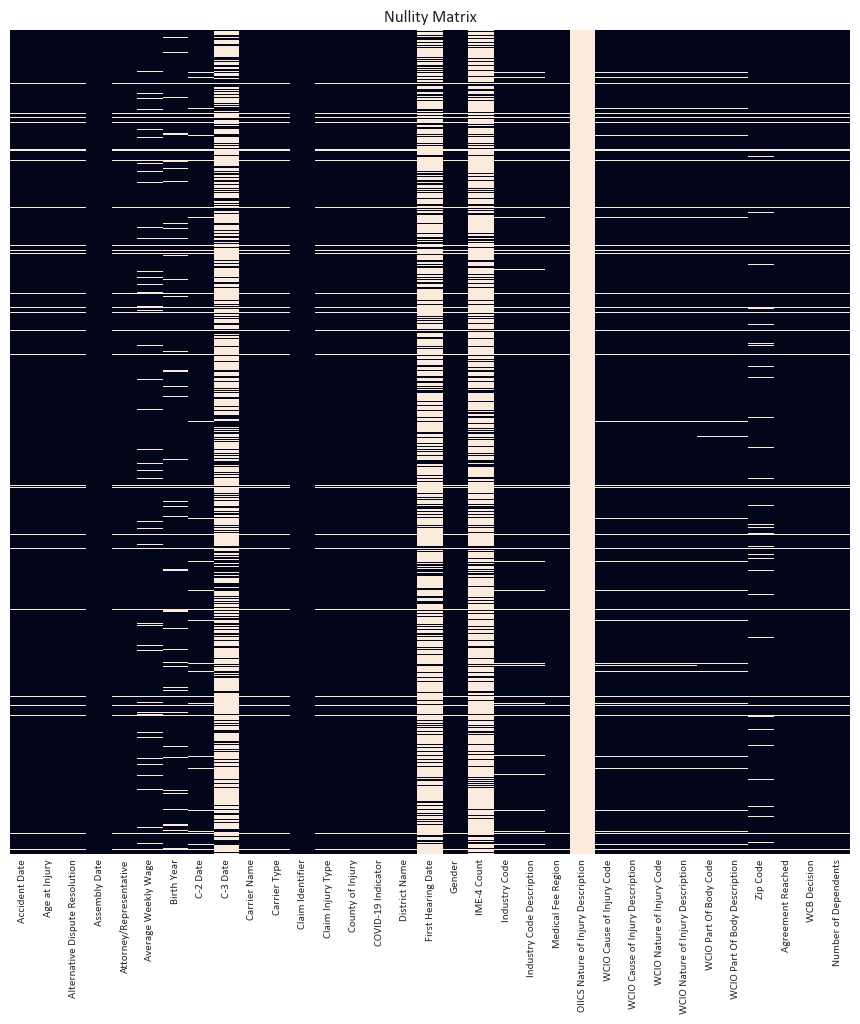

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isna(),vmin=False, vmax=True, cbar=False)
plt.yticks([])
plt.title('Nullity Matrix')
plt.savefig('./Figures/Nullity_Matrix.png')


In [ ]:
data.info()
columns_to_drop = ['']
lineplot = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date', ]
barplot = ['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Name',
           'Carrier Type', 'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
           'District Name', 'Gender', 'Medical Fee Region', 'Agreement Reached', 'WCB Decision', 'Number of Dependents']
no_go = ['Claim Identifier', ]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [ ]:
hist_box = [('Age at Injury', 11), ('Average Weekly Wage', 50), ('Birth Year', 50), ('IME-4 Count', 70)]




#density_and_boxplot(DataSet=data,
#                    column_label='Age at Injury',
#                    figure_name='Age at Injury'.replace(' ','_'),
#                    bins=11,
#                    desired_x_label='Age at Injury',
#                    save=True,
#                    box_left=0.128,
#                    box_width=0.84)

#density_and_boxplot(DataSet=data,
#                    column_label='Average Weekly Wage',
#                    figure_name='Average Weekly Wage'.replace(' ','_'),
#                    bins=50,
#                    desired_x_label='Average Weekly Wage',
#                    save=True,
#                    box_left=0.137,
#                    box_width=0.835)

#density_and_boxplot(DataSet=data,
#                    column_label='Birth Year',
#                    figure_name='Birth Year'.replace(' ','_'),
#                    bins=50,
#                    desired_x_label='Birth Year',
#                    save=True,
#                    box_left=0.127,
#                    box_width=0.84)


/var/folders/1g/tnx9vh053nx66ms0z4swy2nh0000gn/T/ipykernel_21531/945381560.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( data=i_count, palette=i_colors[:int(len(i_colors)/2):-1])
/var/folders/1g/tnx9vh053nx66ms0z4swy2nh0000gn/T/ipykernel_21531/945381560.py:12: UserWarning: 
The palette list has fewer values (19) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot( data=i_count, palette=i_colors[:int(len(i_colors)/2):-1])
/var/folders/1g/tnx9vh053nx66ms0z4swy2nh0000gn/T/ipykernel_21531/945381560.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( data=i_count, palette=i_colors[:int(len(i_colors)/2):-1])
/var/folders/1g/tnx9vh053nx66ms0z4swy2nh

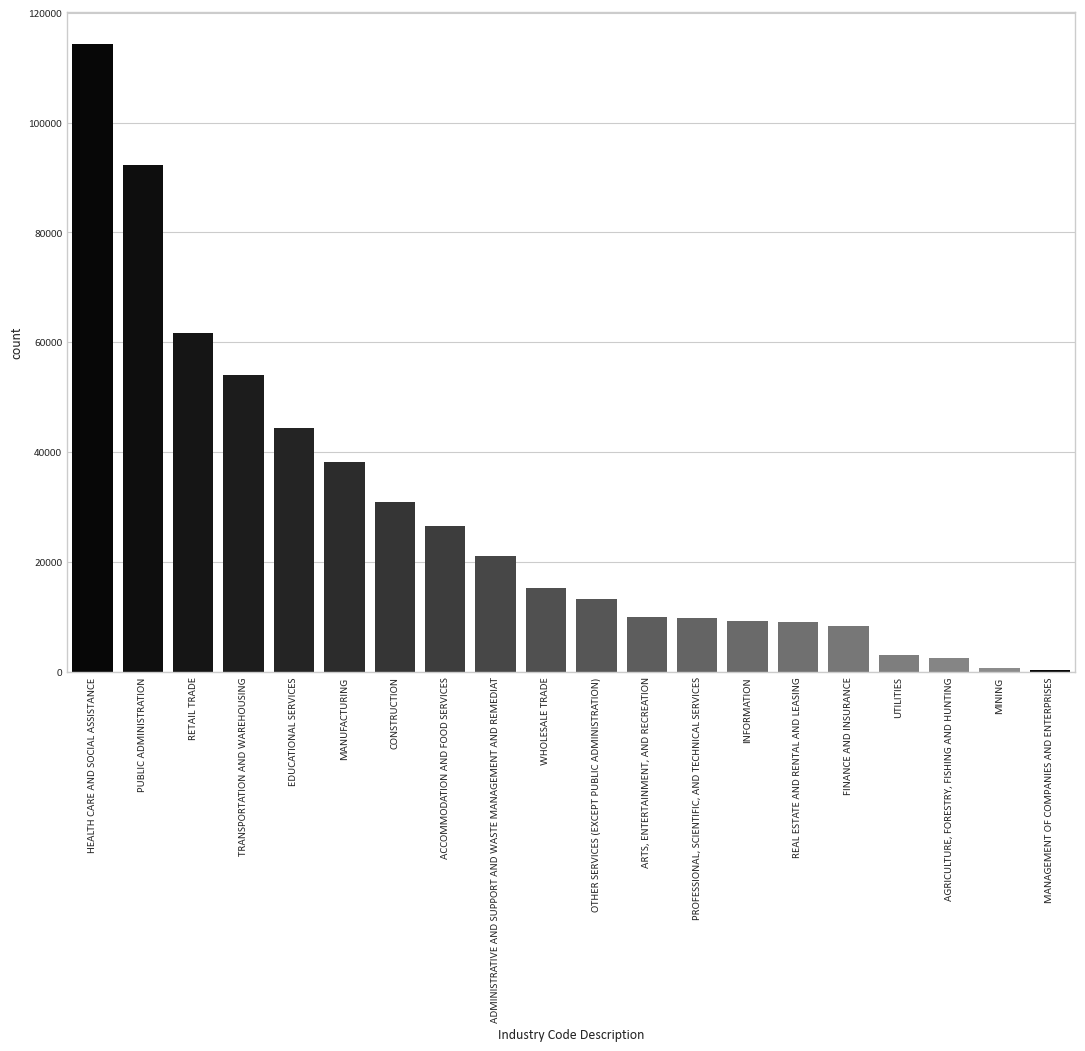

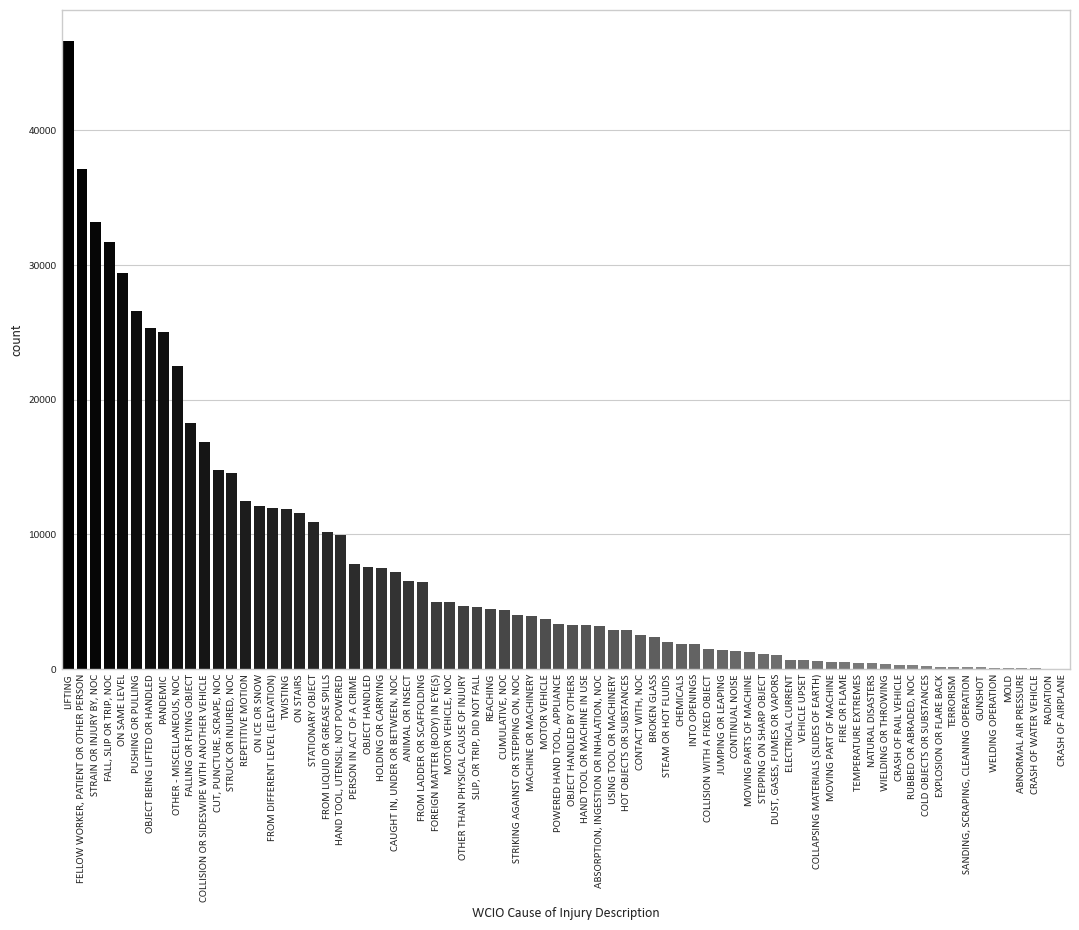

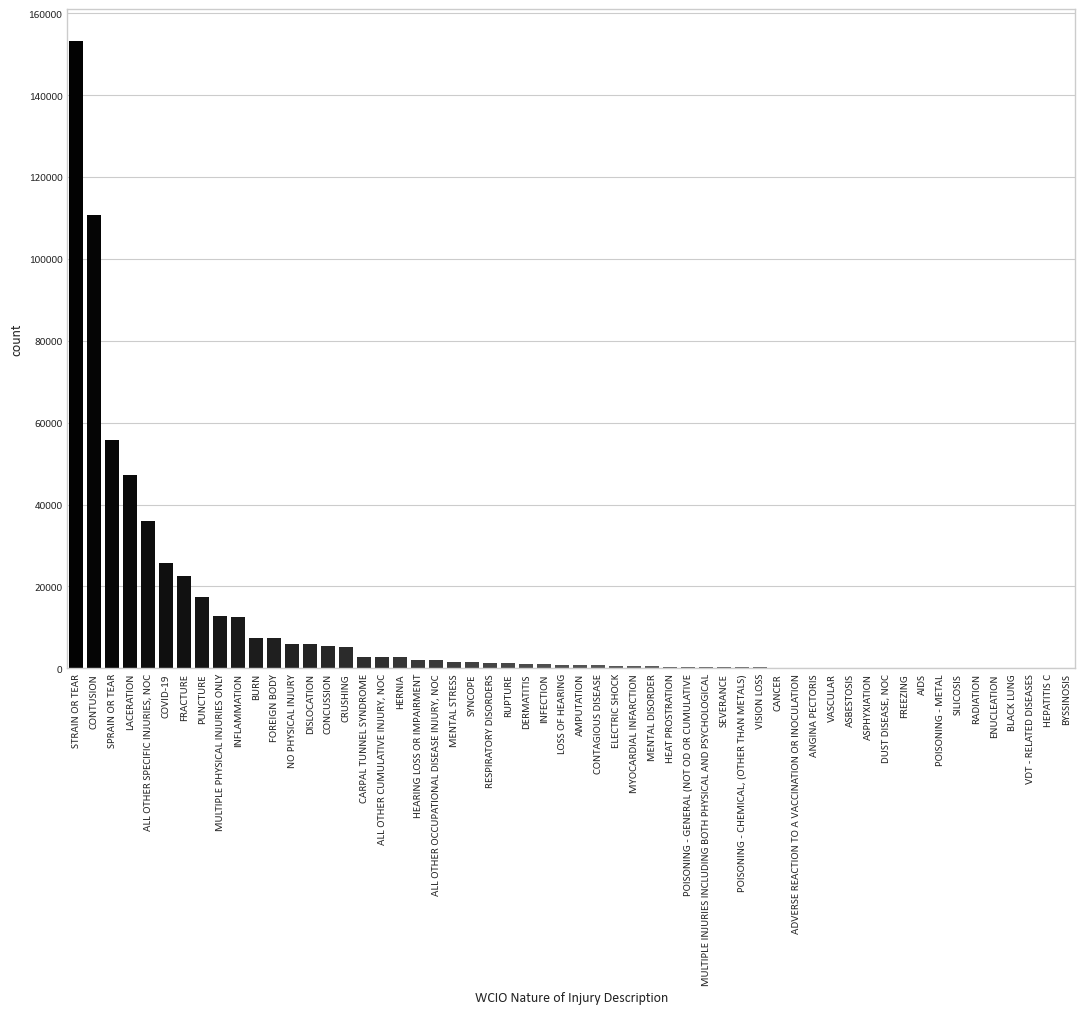

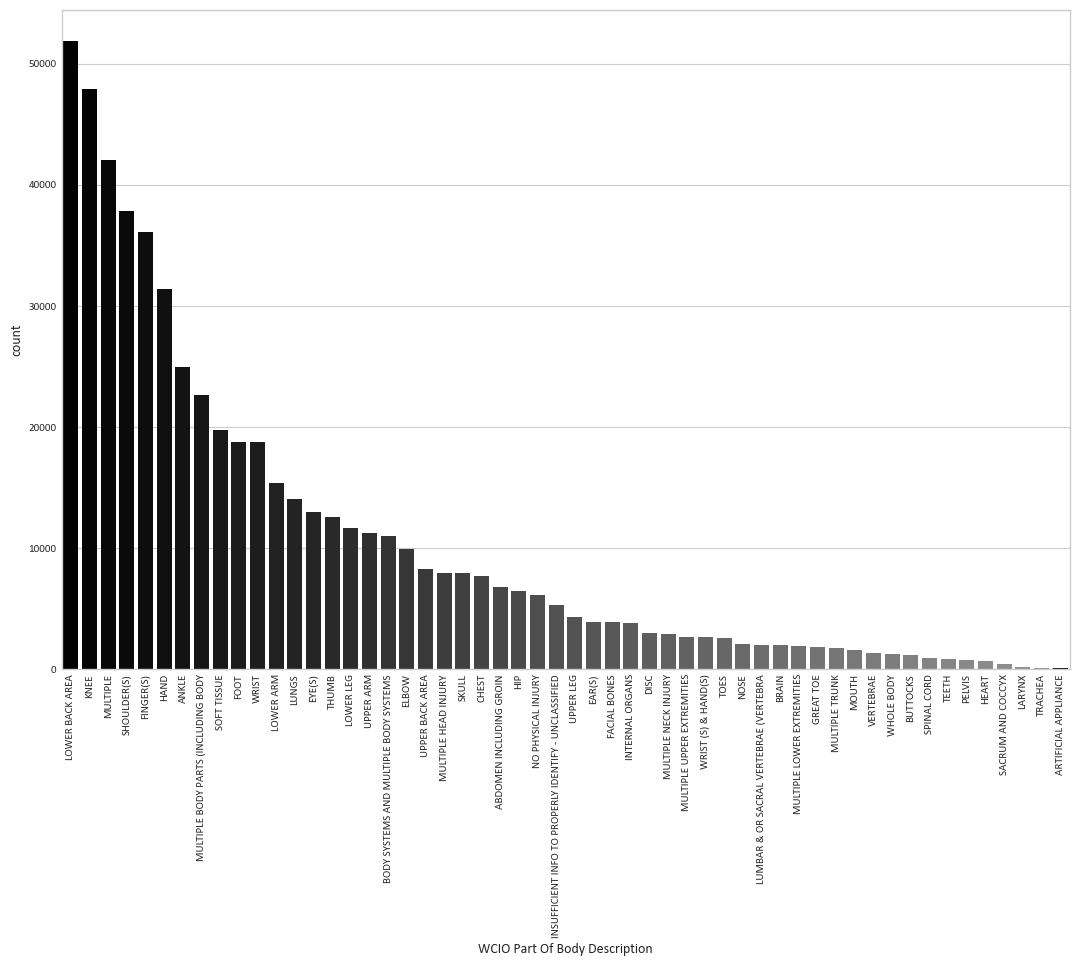

In [ ]:
barplot = [('Industry Code', 'Industry Code Description'),
           ('WCIO Cause of Injury Code','WCIO Cause of Injury Description'),
           ('WCIO Nature of Injury Code', 'WCIO Nature of Injury Description'),
           ('WCIO Part Of Body Code', 'WCIO Part Of Body Description'),'Number of Dependents']


for i, j in barplot[:-1]:
    to_plot = data.loc[:, i:j]
    i_count = to_plot[j].value_counts()
    i_colors = sns.color_palette("Greys", len(i_count)*2)
    plt.figure(figsize=(12,8))
    sns.barplot( data=i_count, palette=i_colors[:int(len(i_colors)/2):-1])
    plt.xticks(rotation=90)
    plt.savefig('Figures/' + i.replace(' ', '_'), bbox_inches='tight')


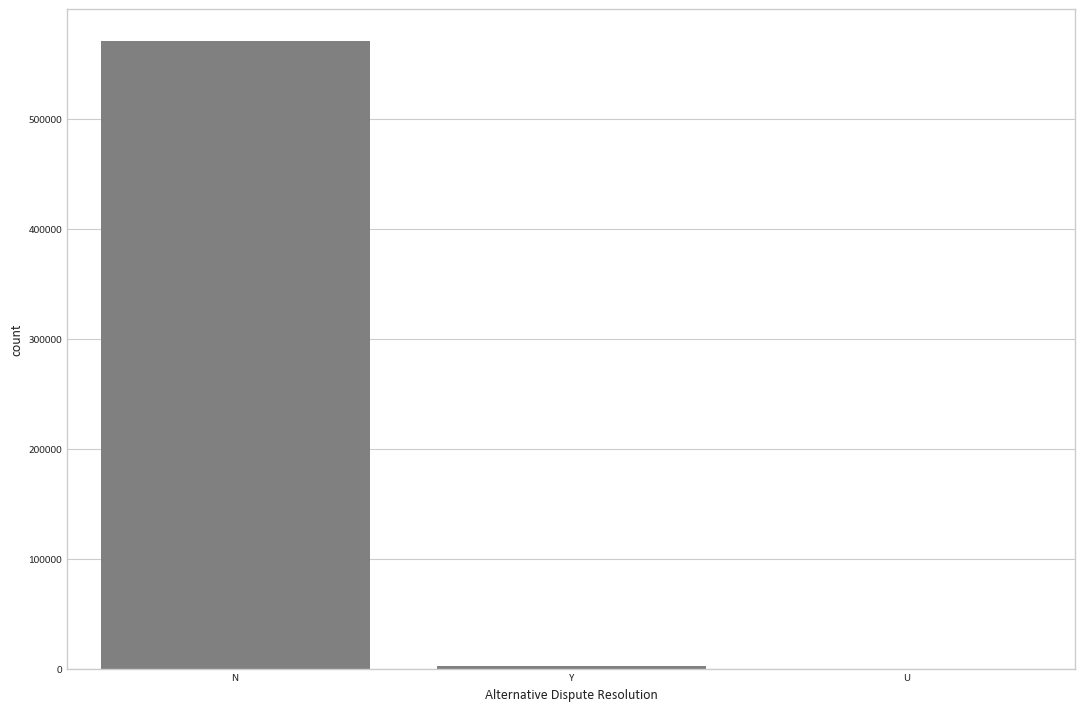

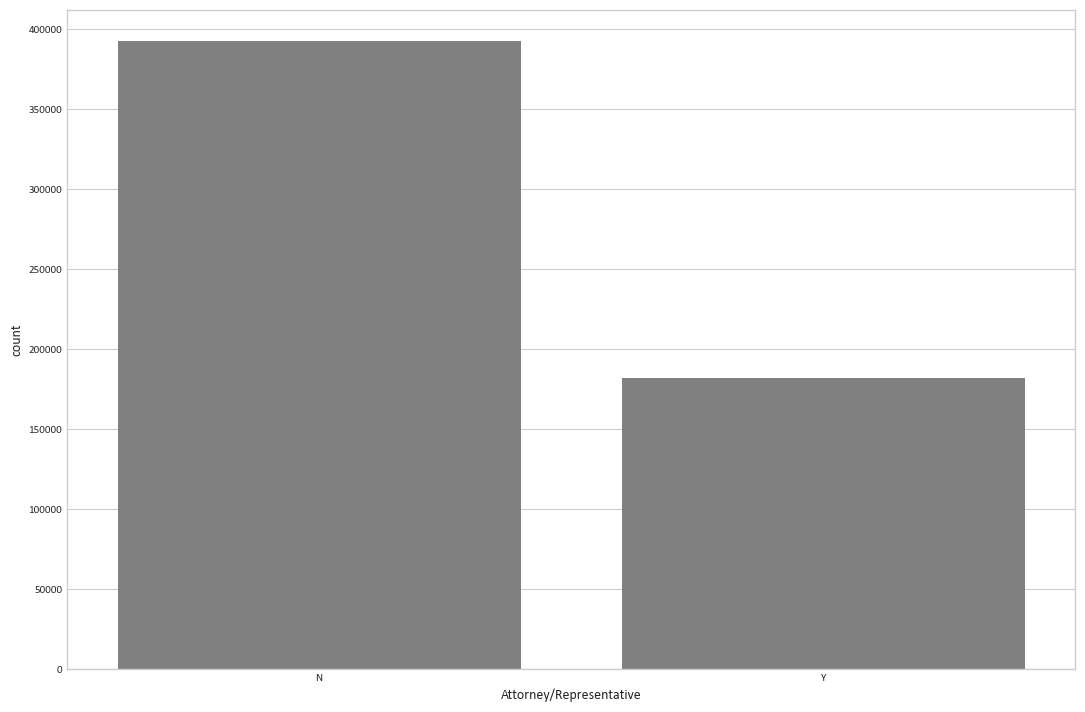

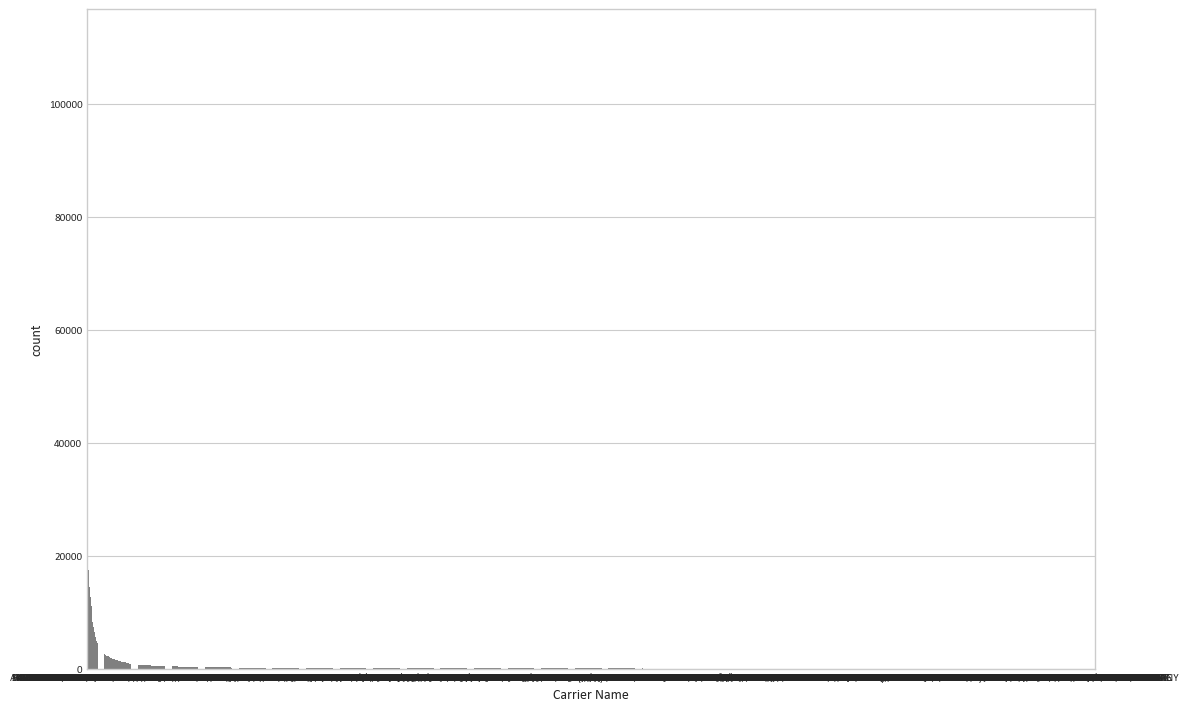

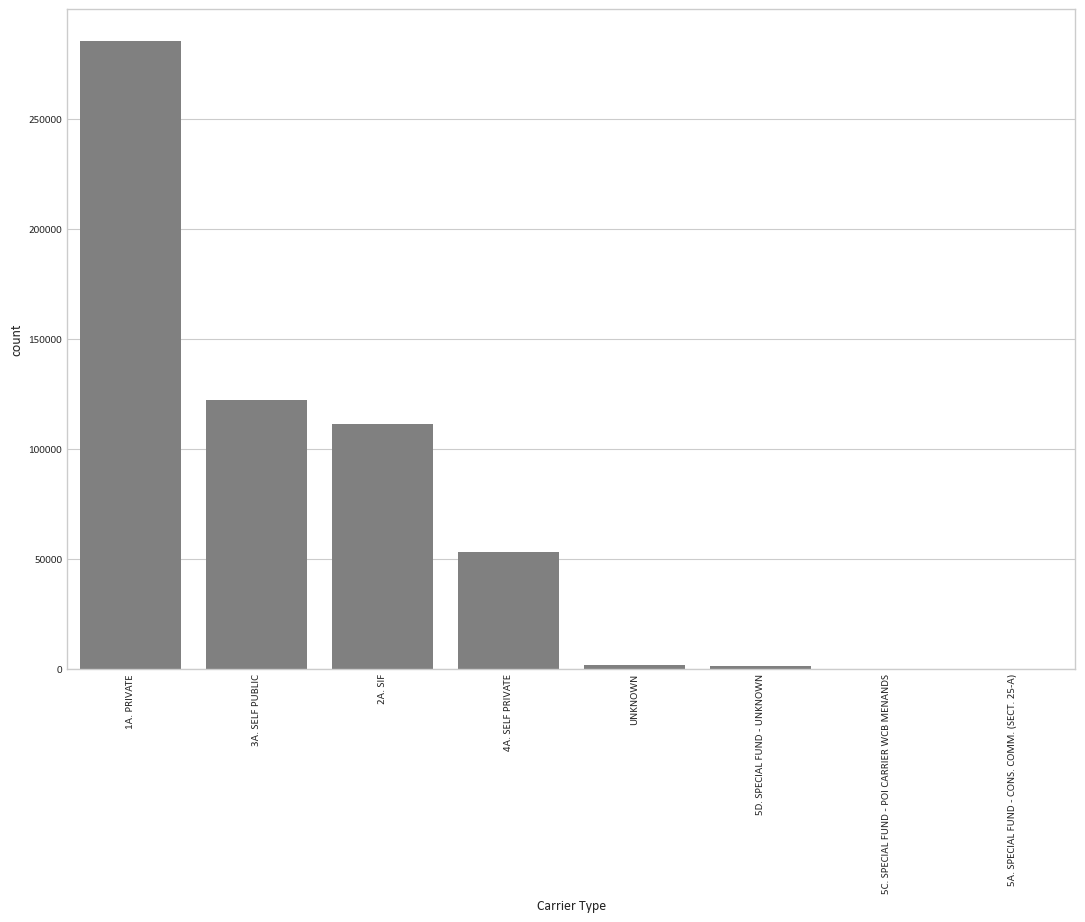

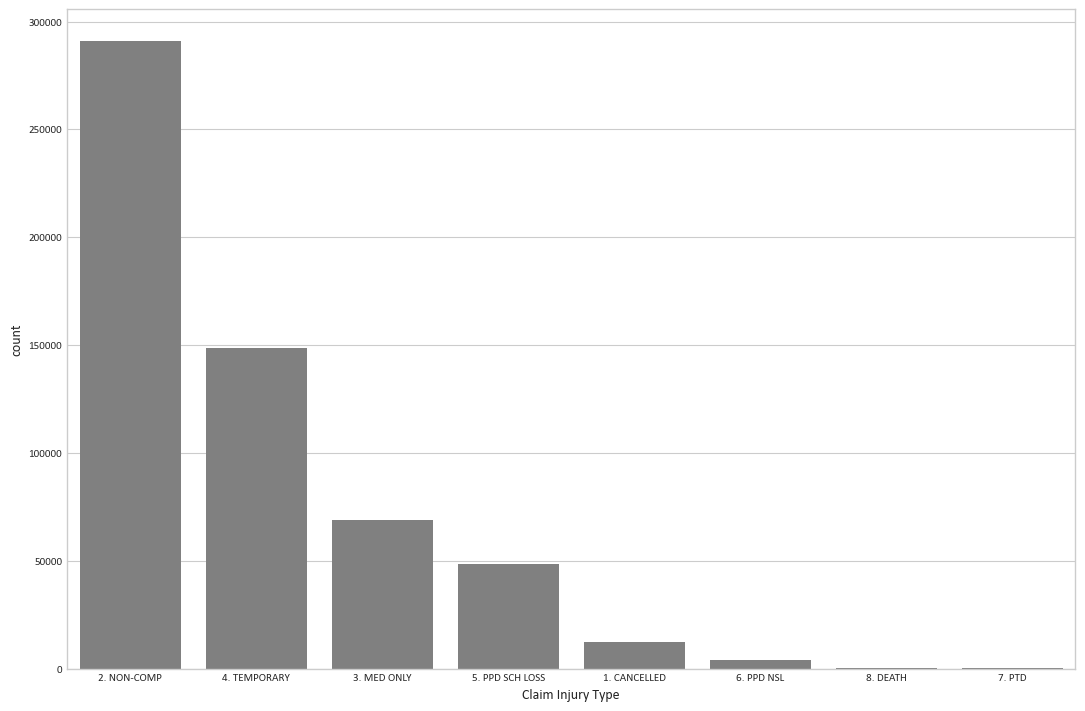

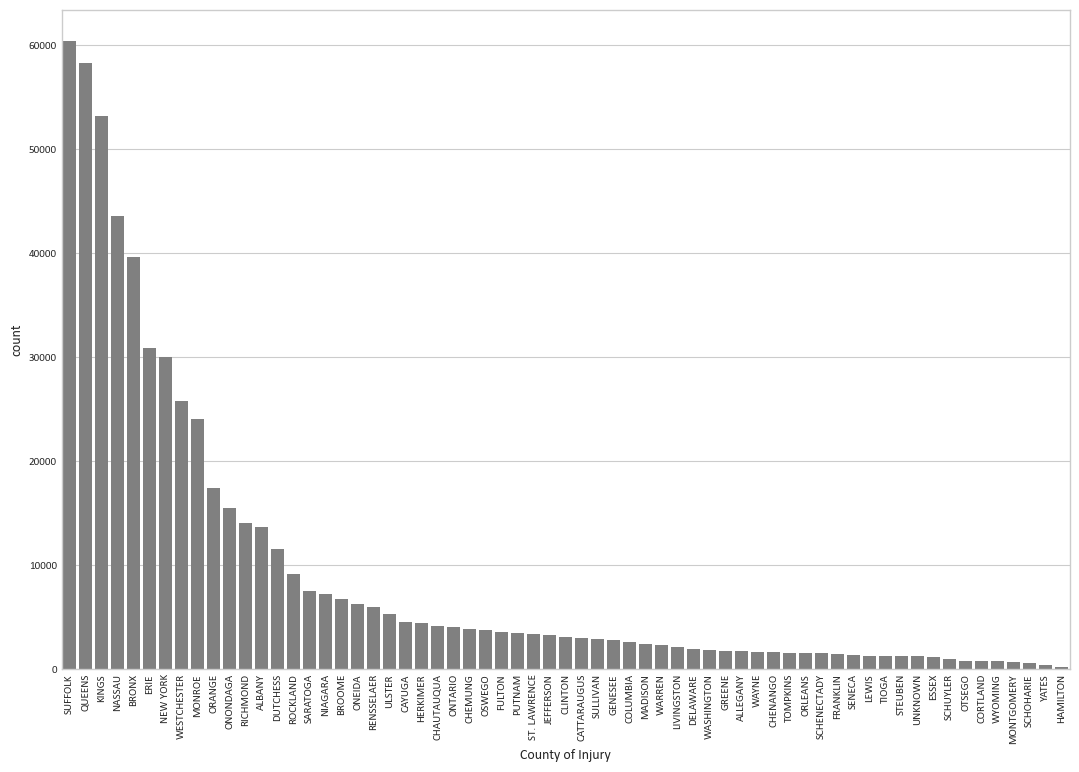

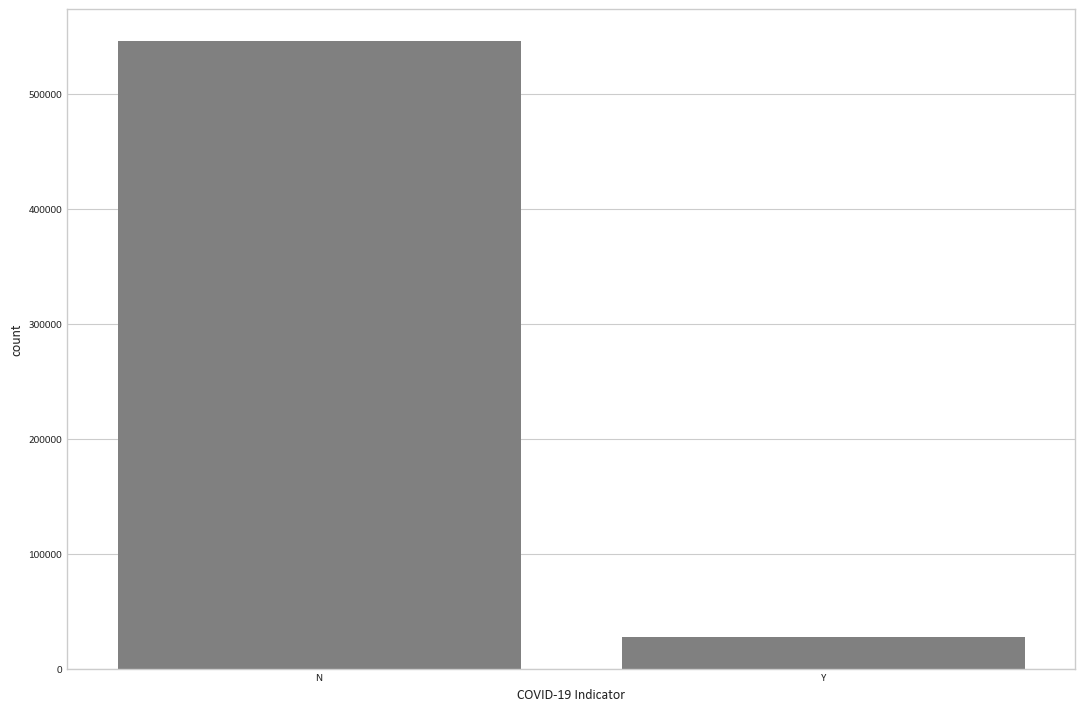

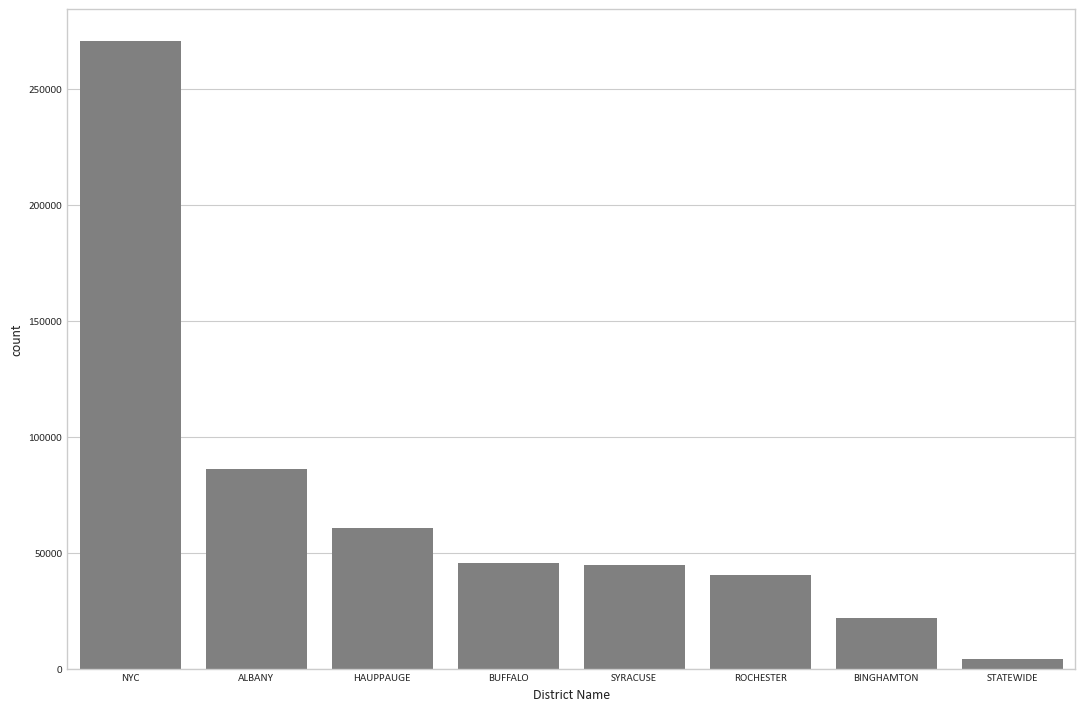

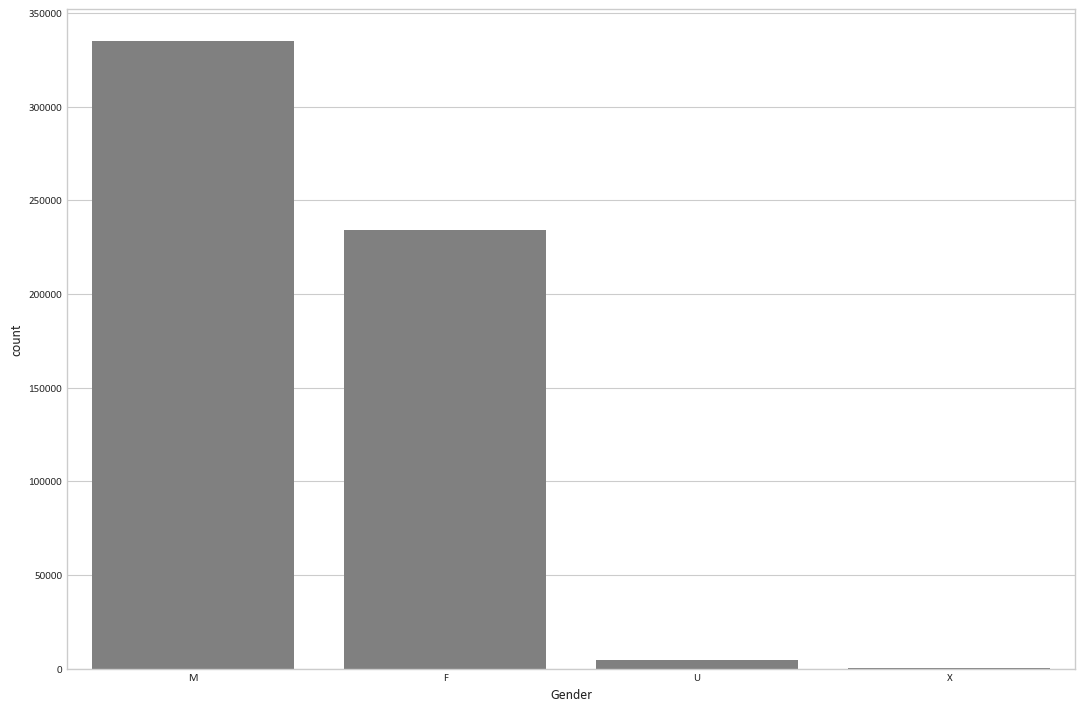

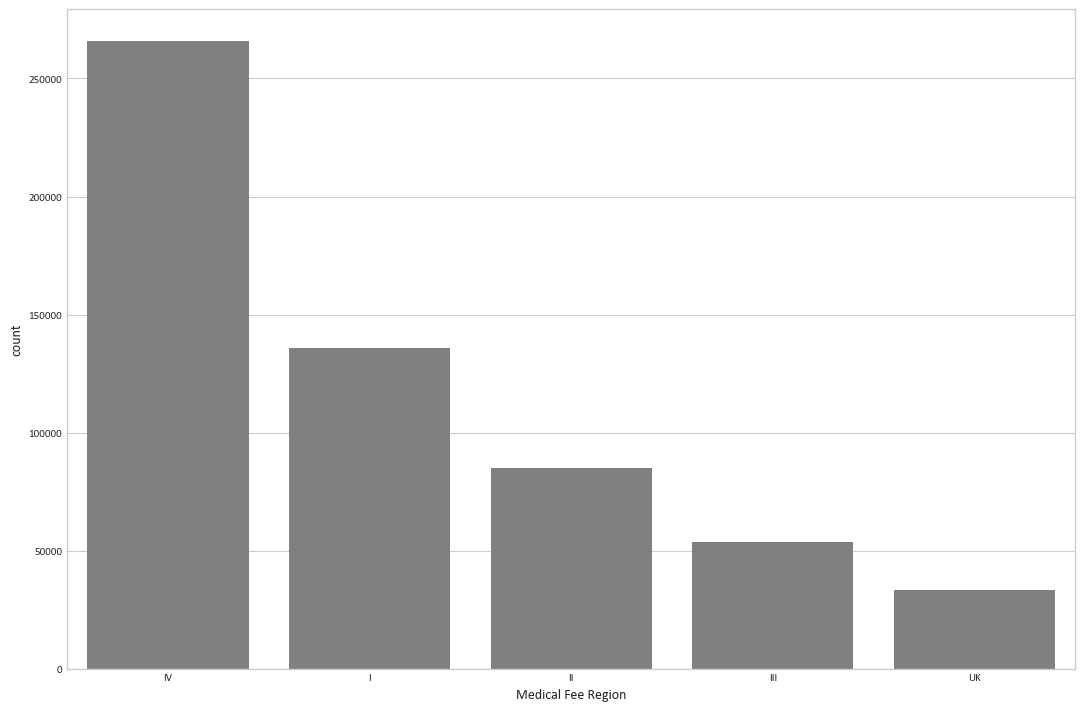

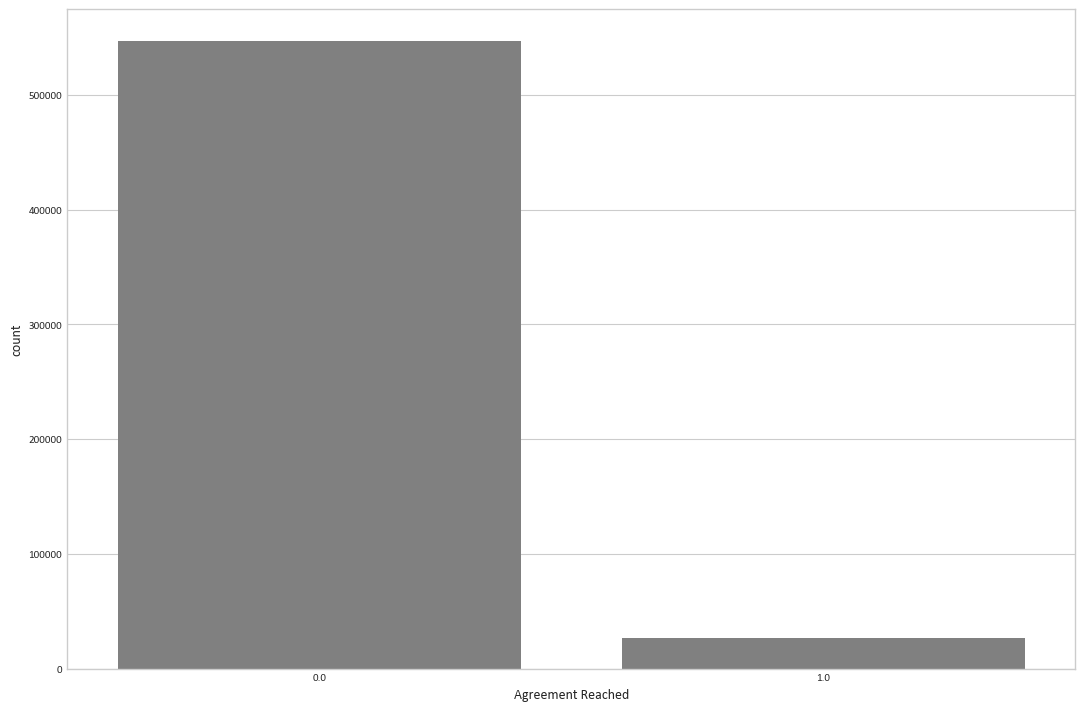

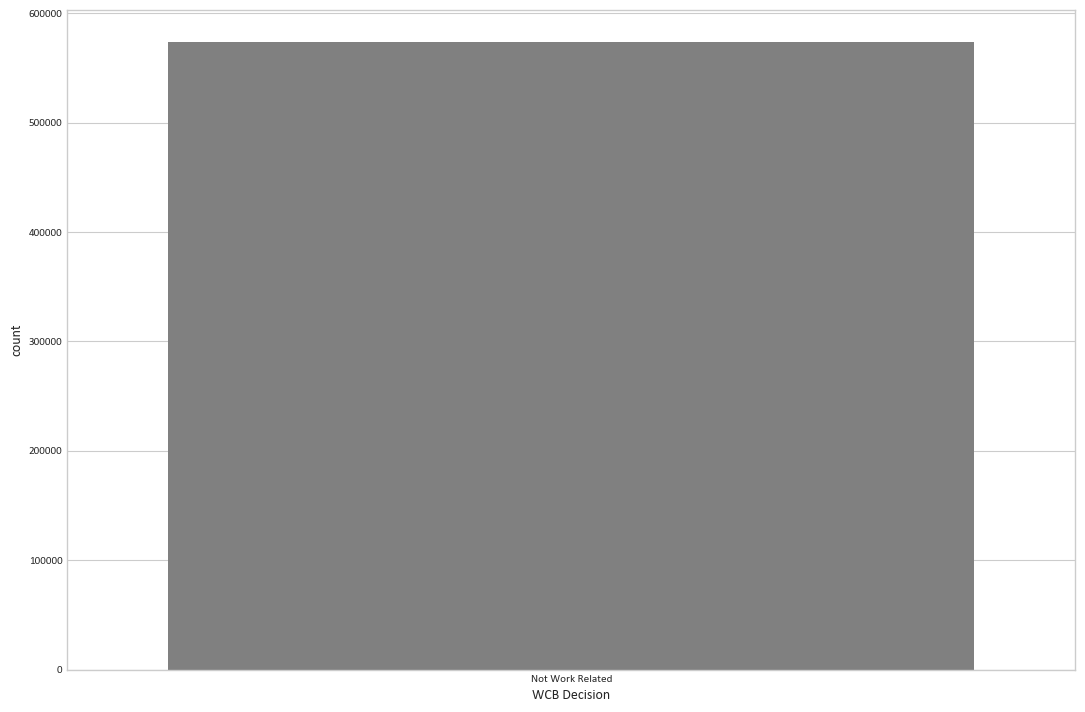

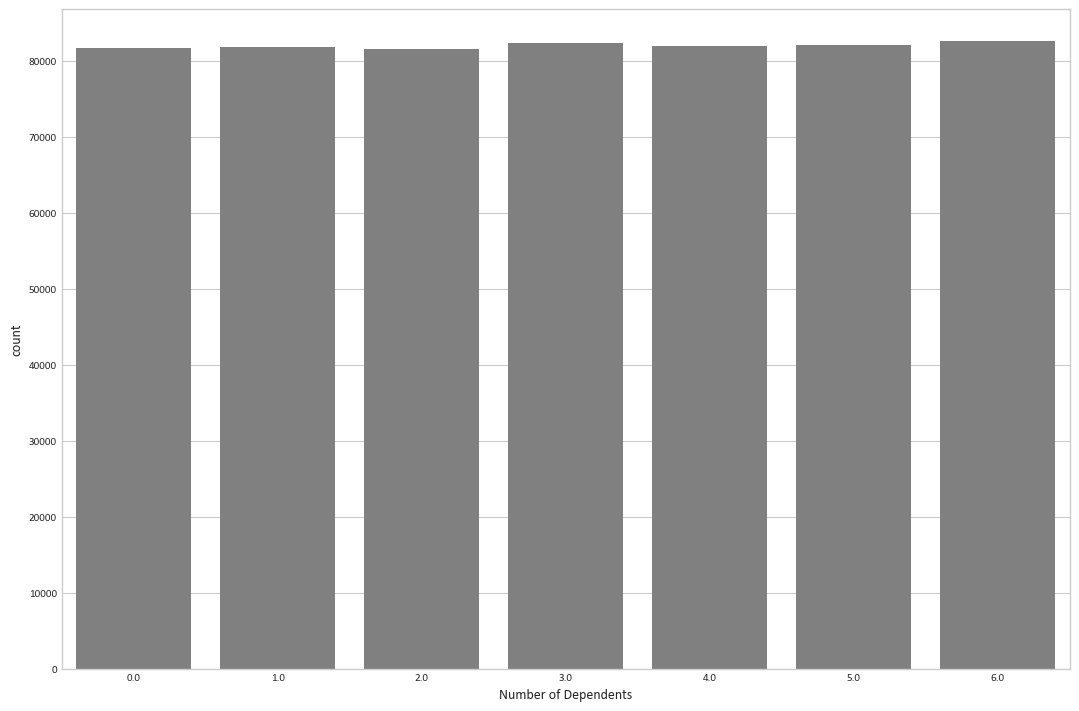

In [ ]:
barplot = ['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Name',
           'Carrier Type', 'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
           'District Name', 'Gender', 'Medical Fee Region', 'Agreement Reached', 'WCB Decision',
           'Number of Dependents']

rotate_x_labels = ['Carrier Type', 'County of Injury']



for i in barplot:
    i_count = data[i].value_counts(sort=True)
    plt.figure(figsize=(12,8))
    sns.barplot(data=i_count, color='grey')

    if i in rotate_x_labels:
        plt.xticks(rotation=90)

    if i == 'Attorney/Representative':
        plt.savefig('./Figures/Attorney_Representative')
    else:
        plt.savefig('Figures/barplots_' + i.replace(' ', '_'), bbox_inches='tight')
